# Equi Boots Graphical Notebook

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import os
import sys

# Add path to import EquiBoots
script_path = os.path.abspath("../py_scripts")
print("Appending path:", script_path)
sys.path.append(script_path)

Appending path: /home/lshpaner/Documents/GitHub_Repositories/equi_boots/py_scripts


In [2]:
import equiboots as eqb

## Prepping equiboots

### Classification Mock-Up

In [3]:
# Generate synthetic test data
y_prob = np.random.rand(1000)
y_pred = y_prob > 0.5
y_true = np.random.randint(0, 2, 1000)

race = (
    np.random.RandomState(3)
    .choice(["white", "black", "asian", "hispanic"], 1000)
    .reshape(-1, 1)
)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)

fairness_df = pd.DataFrame(
    data=np.concatenate((race, sex), axis=1), columns=["race", "sex"]
)

# Initialize and process groups
eq = eqb.EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
)
eq.grouper(groupings_vars=["race", "sex"])
sliced_data = eq.slicer("race")

Groups created


## ROC AUC by Group (ex. Race)

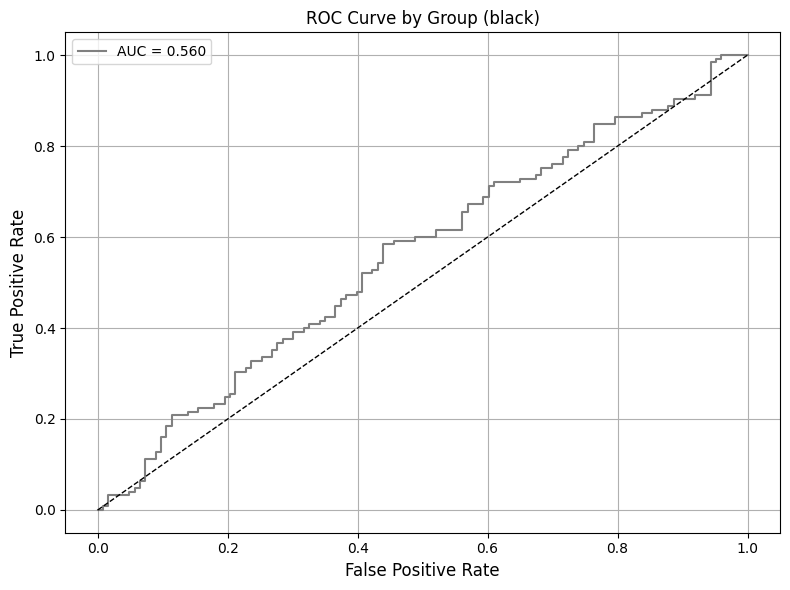

In [4]:
eqb.eq_plot_roc_auc(
    data=sliced_data,
    # title="ROC Curve by Race",
    decimal_places=3,
    save_path="./images",
    # title=None,
    # label_fontsize=20,
    # tick_fontsize=10,
    color_by_group=False,
    # subplots=True,
    group="black",
    # curve_kwgs={
    #     "black": {"color": "#FF5733", "alpha": 0.7, "linestyle": "--", "linewidth": 2},
    #     "white": {"color": "#1F77B4", "alpha": 0.8, "linewidth": 2},
    # },
    # line_kwgs={"color": "black", "linestyle": "dotted", "linewidth": 2},
)

## Precision-Recall Curves

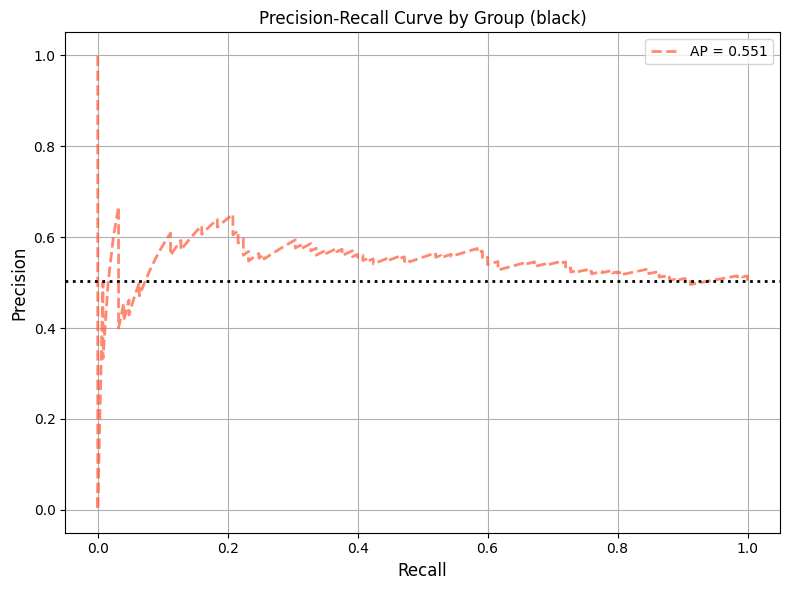

In [5]:
eqb.eq_plot_precision_recall(
    data=sliced_data,
    # title="Precision-Recall Curve by Race",
    decimal_places=3,
    save_path="./images",
    # subplots=True,
    group="black",
    curve_kwgs={
        "black": {"color": "#FF5733", "alpha": 0.7, "linestyle": "--", "linewidth": 2},
        "white": {"color": "#1F77B4", "alpha": 0.8, "linewidth": 2},
    },
    line_kwgs={"color": "black", "linestyle": "dotted", "linewidth": 2},
)

## Calibration Plot

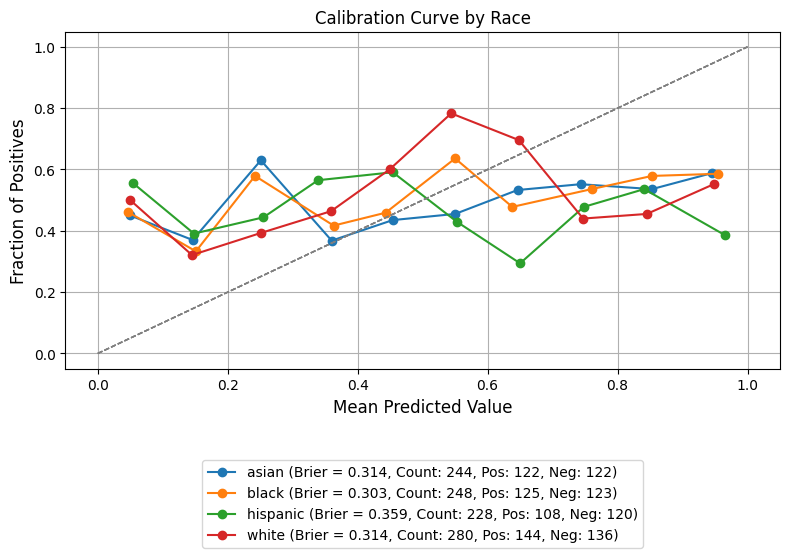

In [6]:
# Calibration plot
fig3 = eqb.eq_calibration_curve_plot(
    data=sliced_data,
    n_bins=10,
    title="Calibration Curve by Race",
    # title=None,
    # tick_fontsize=8,
    # group="asian",
    # subplots=True,
    # n_cols=2,
    # n_rows=1,
    decimal_places=3,
    save_path="./images",
)
fig3

## Bootstrap Graphs

In [7]:
eq2 = eqb.EquiBoots(
    y_true,
    y_prob,
    y_pred,
    fairness_df,
    fairness_vars=["race", "sex"],
    reference_groups=["white", "M"],
    task="binary_classification",
    bootstrap_flag=True,
    num_bootstraps=10,
    boot_sample_size=100,
    balanced=False,  # False is stratified, True is balanced
    # stratify_by_outcome=True,
)

# Set seeds
int_list = np.linspace(0, 100, num=10, dtype=int).tolist()

eq2.set_fix_seeds(int_list)

print("seeds", eq2.seeds)

eq2.grouper(groupings_vars=["race", "sex"])
sliced_data = eq.slicer("race")

data = eq2.slicer("race")
race_metrics = eq2.get_metrics(data)

dispa = eq2.calculate_disparities(race_metrics, "race")

melted = pd.DataFrame(dispa).melt()
df = melted["value"].apply(pd.Series).assign(attribute_value=melted["variable"])

seeds [0, 11, 22, 33, 44, 55, 66, 77, 88, 100]


Bootstrapping iterations: 100%|██████████| 10/10 [00:00<00:00, 539.47it/s]

Groups created


### Disparity plots

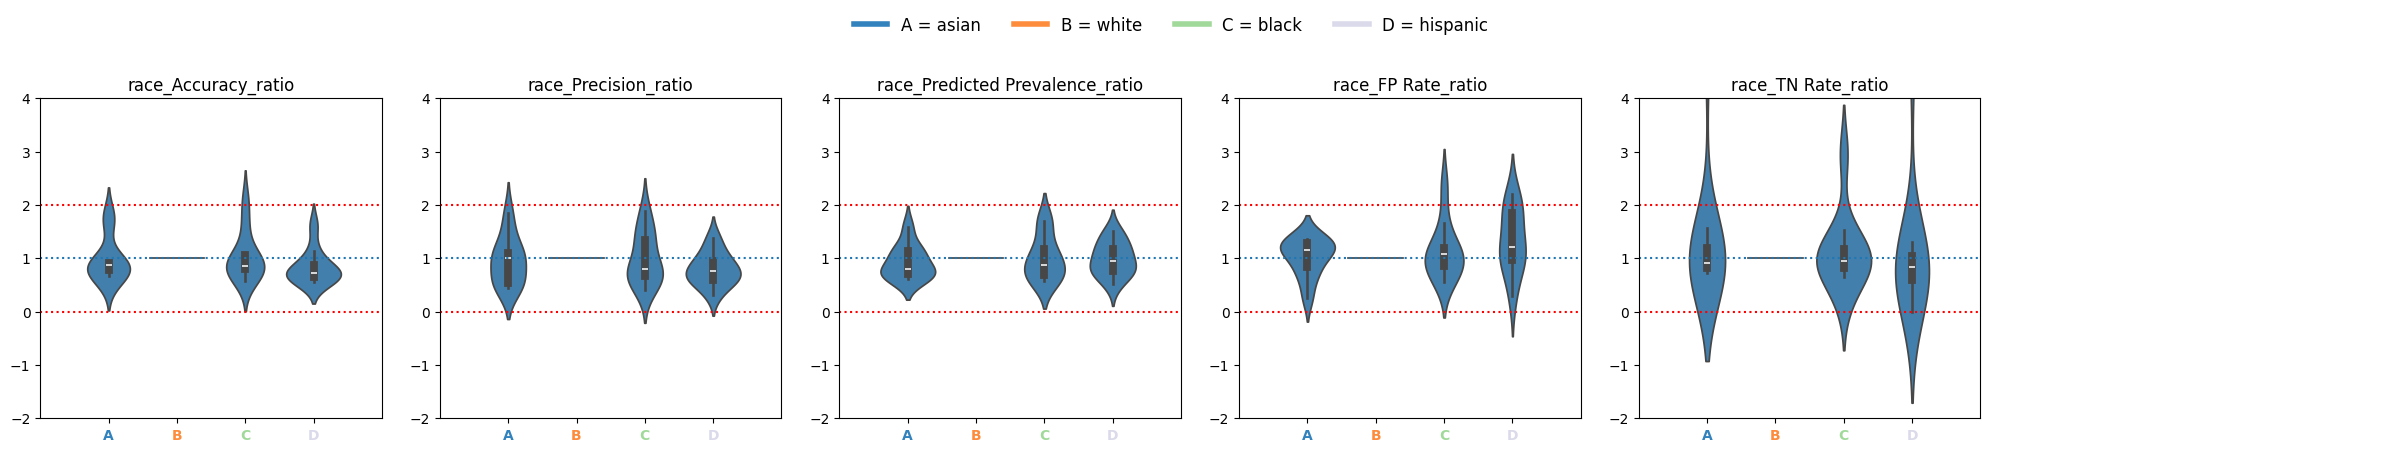

In [8]:
eqb.eq_disparity_metrics_plot(
    dispa,
    metric_cols=[
        "Accuracy_ratio",
        "Precision_ratio",
        "Predicted Prevalence_ratio",
        "FP Rate_ratio",
        "TN Rate_ratio",
    ],
    name="race",
    categories="all",
    figsize=(24, 4),
    plot_kind="violinplot",
    save_path="./images",
)

### ROCAUC Bootstrap

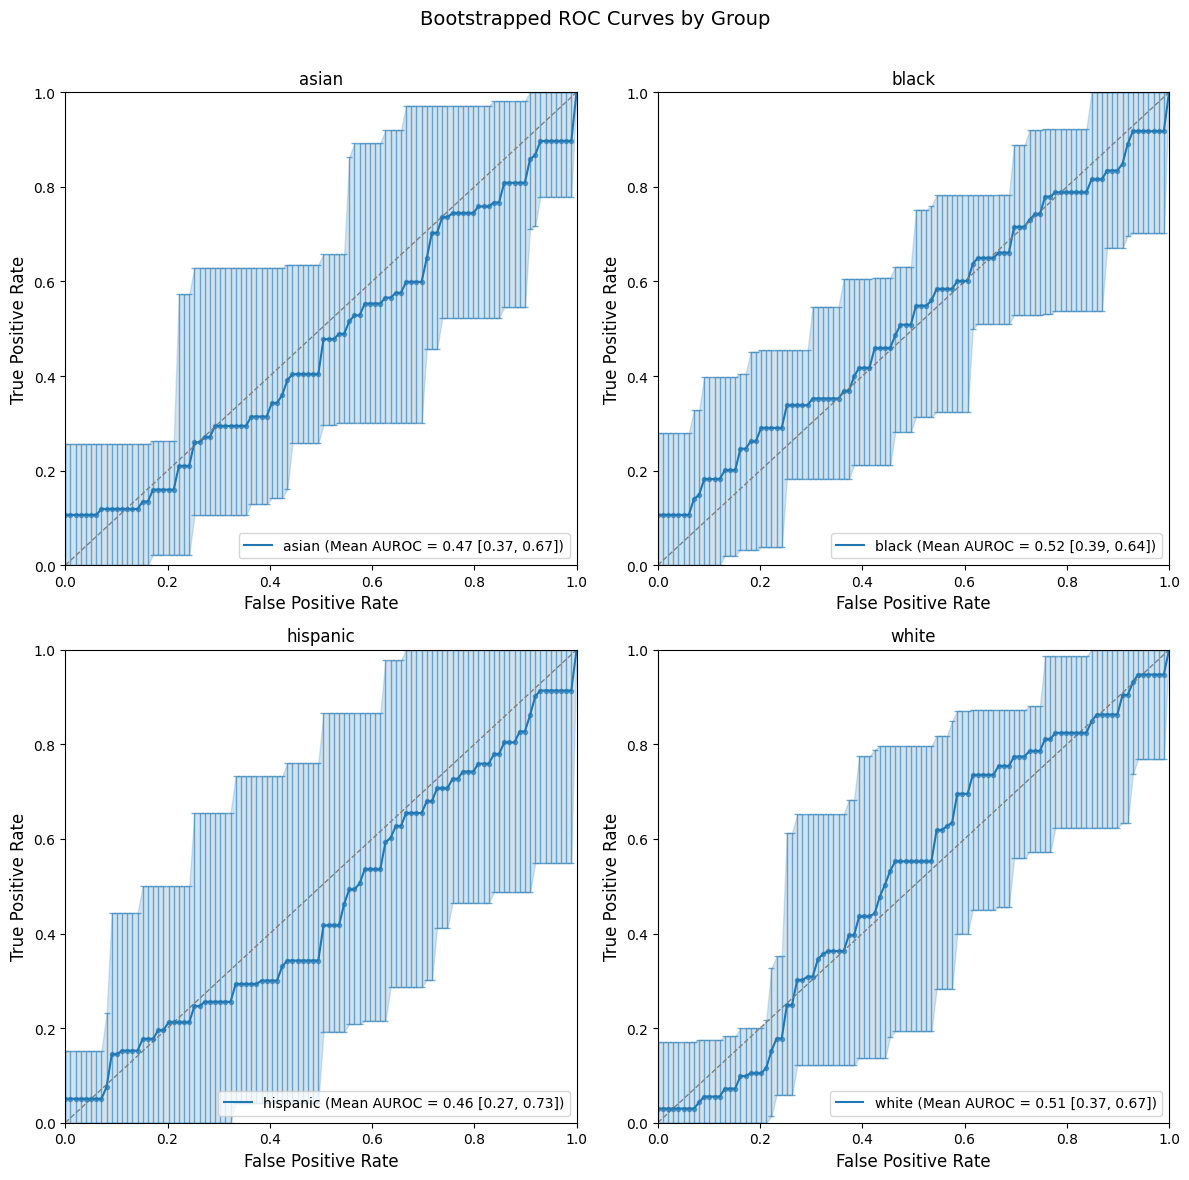

In [9]:
from equiboots import eq_plot_bootstrapped_roc_curves

sliced = eq2.slicer(slicing_var="race")
eq_plot_bootstrapped_roc_curves(
    sliced,
    bar_every=100,
    subplots=True,
    # group="black",
    # n_cols=2,
    # n_rows=1,
    figsize=(6, 6),
    # curve_kwgs={
    #     "black": {"color": "#FF5733", "alpha": 0.7, "linestyle": "--", "linewidth": 2},
    #     "white": {"color": "#1F77B4", "alpha": 0.8, "linewidth": 4},
    # },
    show_grid=False,
    # uniform_color="blue",
    # fill_kwgs={
    #     "asian": {"alpha": 0.1, "color": "skyblue", "hatch": "//"},
    #     "black": {"alpha": 0.2, "color": "salmon", "linewidth": 0.5},
    # },
    color_by_group=False,
    save_path="./images",
)

In [10]:
sliced_data

{'asian': {'y_true': array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
         1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
         0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
         0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
         1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
         1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
         0, 1]),
  'y_prob': array([5.78087341e-01, 3.53127407e-01, 2.27922812e-01, 6.20990223e-01,
         4.39684651e-01, 9.29790979e-01, 8.14754240e-01,

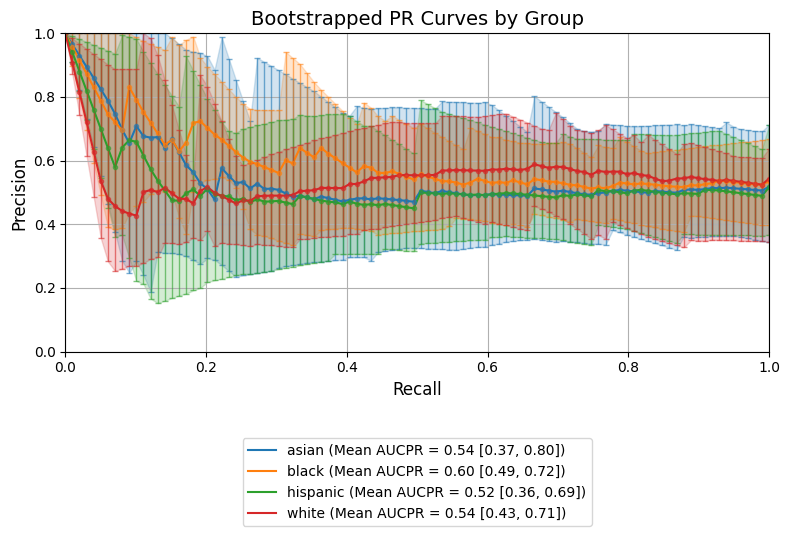

In [11]:
plot = eqb.eq_plot_bootstrapped_pr_curves(
    sliced,
    bar_every=100,
    save_path="./images",
    filename="pr_curves",
    # group="black"
    # subplots=True,
)

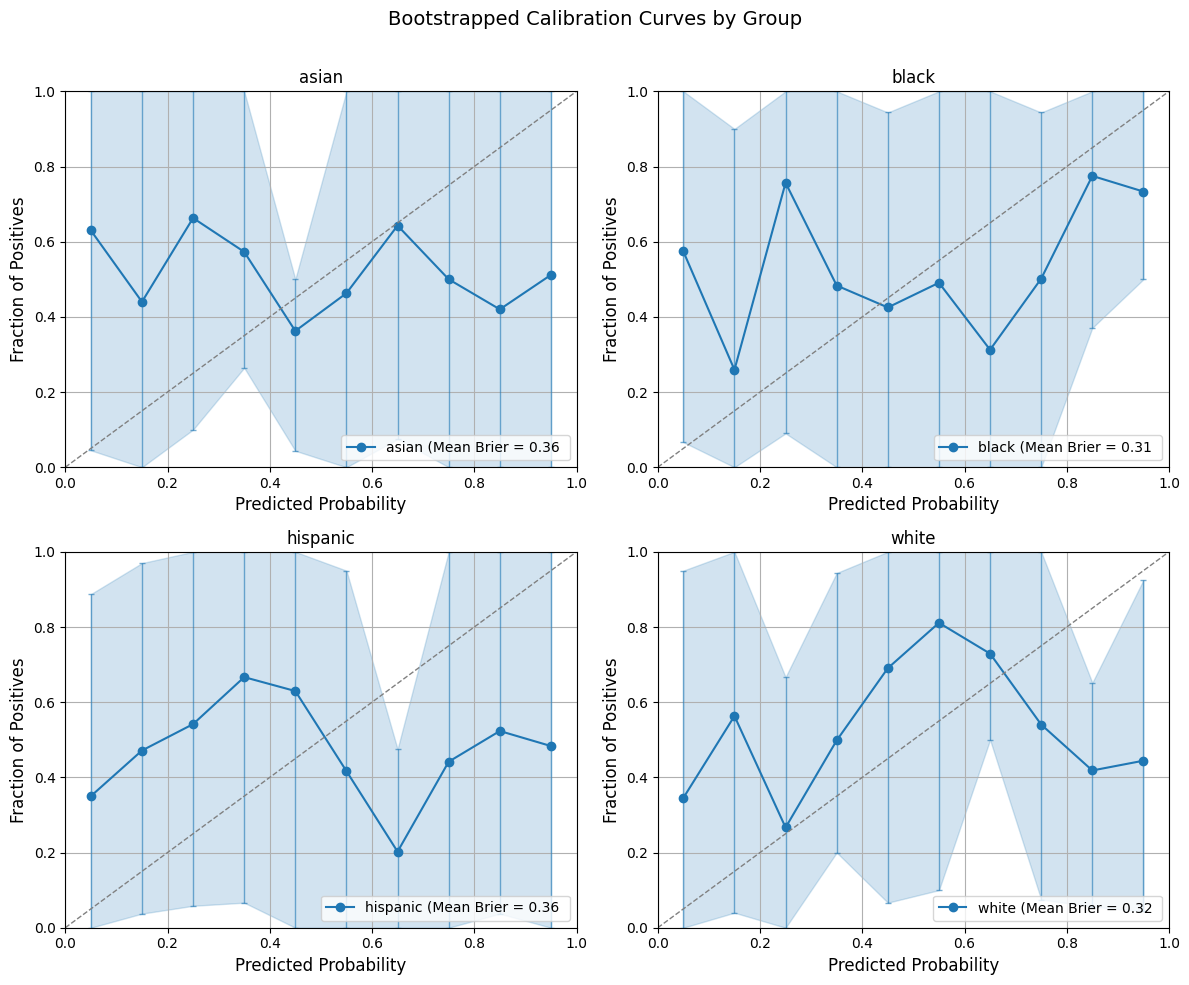

In [12]:
eqb.eq_plot_bootstrapped_calibration_curves(
    sliced,
    save_path="./images",
    # subplots=True,
    color_by_group=False,
    subplots=True,
    # group="black",
    # line_kwgs={"asian": {"linewidth": 2}},
)

### Regression Mock-Up

In [13]:
## Generate synthetic regression-like data
np.random.seed(42)
y_true = np.random.normal(loc=50, scale=10, size=1000)  ## continuous target
y_pred = y_true + np.random.normal(
    loc=0, scale=5, size=1000
)  # predicted value with noise

# Not really 'prob', but using this slot for predicted values
y_prob = y_pred

race = (
    np.random.RandomState(3)
    .choice(["white", "black", "asian", "hispanic"], 1000)
    .reshape(-1, 1)
)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)

fairness_df = pd.DataFrame(
    data=np.concatenate((race, sex), axis=1), columns=["race", "sex"]
)

# Initialize and process groups
eq3 = eqb.EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    task="regression",
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
)
eq3.grouper(groupings_vars=["race", "sex"])
sliced_data_2 = eq3.slicer("race")

Groups created


## Regression Residuals

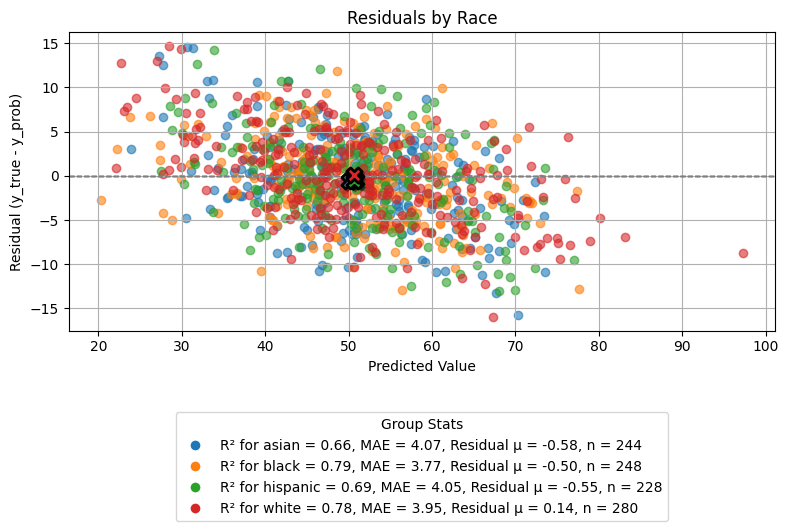

In [14]:
eqb.eq_plot_residuals_by_group(
    data=sliced_data_2,
    # y_true=y_true,
    # y_prob=y_pred,
    # group="black",
    title="Residuals by Race",
    filename="residuals_by_race",
    # subplots=True,
    # group="black",
    color_by_group=True,
    # n_cols=1,
    # n_rows=2,
    figsize=(8, 6),
    show_centroids=True,
    save_path="./images",
)